Found 720 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/100
23/23 [==============================] - 18s 580ms/step - loss: 0.6930 - accuracy: 0.5319 - val_loss: 0.7325 - val_accuracy: 0.5000
Epoch 2/100
23/23 [==============================] - 13s 560ms/step - loss: 0.6904 - accuracy: 0.5167 - val_loss: 0.6847 - val_accuracy: 0.6333
Epoch 3/100
23/23 [==============================] - 12s 515ms/step - loss: 0.6700 - accuracy: 0.5847 - val_loss: 0.6752 - val_accuracy: 0.6667
Epoch 4/100
23/23 [==============================] - 11s 489ms/step - loss: 0.6393 - accuracy: 0.6639 - val_loss: 0.6673 - val_accuracy: 0.6667
Epoch 5/100
23/23 [==============================] - 12s 491ms/step - loss: 0.6331 - accuracy: 0.6569 - val_loss: 0.6958 - val_accuracy: 0.5333
Epoch 6/100
23/23 [==============================] - 12s 501ms/step - loss: 0.6042 - accuracy: 0.7208 - val_loss: 0.8129 - val_accuracy: 0.5667
Epoch 7/100
23/23 [==============================] - 12

23/23 [==============================] - 12s 529ms/step - loss: 0.1643 - accuracy: 0.9319 - val_loss: 0.3385 - val_accuracy: 0.8667
Epoch 58/100
23/23 [==============================] - 14s 611ms/step - loss: 0.1600 - accuracy: 0.9361 - val_loss: 0.4129 - val_accuracy: 0.8333
Epoch 59/100
23/23 [==============================] - 13s 548ms/step - loss: 0.1889 - accuracy: 0.9278 - val_loss: 0.5097 - val_accuracy: 0.8333
Epoch 60/100
23/23 [==============================] - 12s 532ms/step - loss: 0.1674 - accuracy: 0.9319 - val_loss: 0.6133 - val_accuracy: 0.7667
Epoch 61/100
23/23 [==============================] - 13s 544ms/step - loss: 0.1348 - accuracy: 0.9500 - val_loss: 0.3131 - val_accuracy: 0.8000
Epoch 62/100
23/23 [==============================] - 13s 548ms/step - loss: 0.1275 - accuracy: 0.9569 - val_loss: 0.3306 - val_accuracy: 0.8667
Epoch 63/100
23/23 [==============================] - 13s 554ms/step - loss: 0.1114 - accuracy: 0.9625 - val_loss: 0.5469 - val_accuracy: 0.833

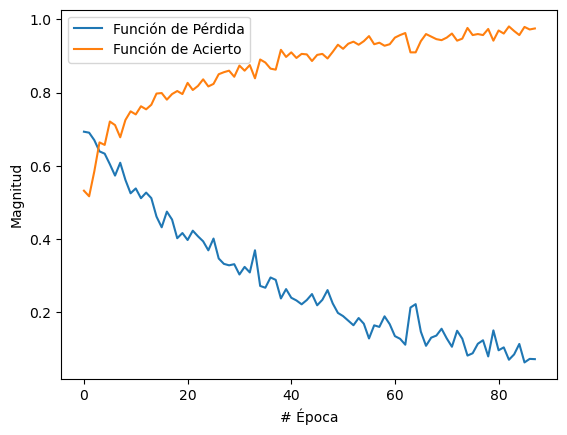

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Especifica las rutas a tus carpetas de entrenamiento y prueba
train_data_dir = 'spirals2/training'
test_data_dir = 'spirals2/testing'

# Especifica el tamaño de tus imágenes y el tamaño del lote (batch size)
img_width, img_height = 100, 100
batch_size = 32

# Configura el generador de imágenes para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Configura el generador de imágenes para prueba (sin aumentación)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Carga las imágenes de entrenamiento desde la carpeta
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Carga las imágenes de prueba desde la carpeta
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Define el modelo
modeloCNN = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Dropout(0.5),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compila el modelo
modeloCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

historial = modeloCNN.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[early_stop])
# historial = modeloCNN.fit(train_generator, epochs=100, validation_data=test_generator)

# Graficar la función de pérdida
plt.plot(historial.history["loss"], label="Función de Pérdida")

# Graficar la función de acierto
plt.plot(historial.history["accuracy"], label="Función de Acierto")

# Etiquetas y leyenda
plt.xlabel("# Época")
plt.ylabel("Magnitud")
plt.legend()

# Mostrar el gráfico
plt.show()

In [7]:
# Evalúa el modelo con el conjunto de datos de prueba
perdida, precision = modeloCNN.evaluate(test_generator)

# Imprime las métricas
print("Pérdida en el conjunto de prueba:", perdida)
print("Precisión en el conjunto de prueba:", precision)

1/1 [==============================] - 0s 313ms/step - loss: 0.1815 - accuracy: 0.9333
Pérdida en el conjunto de prueba: 0.18150725960731506
Precisión en el conjunto de prueba: 0.9333333373069763


In [8]:
import joblib

joblib.dump(modeloCNN, 'modeloCNN_spirals_93.pkl')

['modeloCNN_spirals_93.pkl']

In [9]:
modeloCNN.save('modeloCNN_spirals_93.h5')

C:\Users\Pau Pons\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


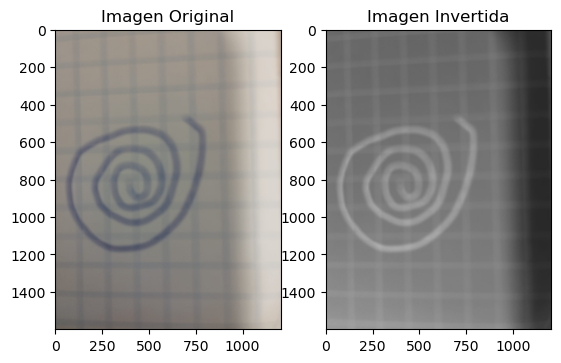

In [47]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen original
ruta_original = "llibreta.jpeg"  # Añadir imagen nueva

# Leer la imagen original
imagen_original = cv2.imread(ruta_original)

# Verificar que la imagen se haya cargado correctamente
if imagen_original is not None:
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

    # Invertir colores en escala de grises
    imagen_invertida = cv2.bitwise_not(imagen_gris)

    # Nombre de la nueva imagen invertida
    nombre_nueva_imagen = "parkinson_negro_prueba.png"

    # Guardar la imagen invertida
    cv2.imwrite(nombre_nueva_imagen, imagen_invertida)

    # Mostrar la imagen original e invertida
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title("Imagen Original")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_invertida, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title("Imagen Invertida")

    plt.show()
else:
    print(f"Error: No se pudo cargar la imagen en: {ruta_original}")


In [48]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

# Cargar el modelo previamente entrenado
modelo_cargado = load_model('modeloCNN_spirals_93.h5')

# Ruta de la imagen que deseas predecir
img_path = nombre_nueva_imagen  # Asegúrate de proporcionar la ruta correcta

# Cargar la imagen y ajustar su tamaño
img = image.load_img(img_path, target_size=(img_width, img_height))

# Convertir la imagen a un array de numpy
img_array = image.img_to_array(img)

# Expandir las dimensiones para que coincidan con las expectativas del modelo
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen
img_array = preprocess_input(img_array)

# Realizar la predicción
prediccion = modelo_cargado.predict(img_array)

print(prediccion)
# Obtener la clase predicha
clase_predicha = "parkinson" if prediccion[0][0] > 0.5 else "healthy"

print("Predicción: " + clase_predicha)


1/1 [==============================] - 0s 204ms/step
[[0.99999994]]
Predicción: parkinson


In [ ]:
from keras.models import load_model

# Cargar el modelo previamente entrenado
modelo_cargado = load_model('modeloCNN_spirals_93.h5')

# Compilar el modelo con un nuevo optimizador, función de pérdida y métricas
modelo_cargado.compile(optimizer='nuevo_optimizador', loss='nueva_funcion_perdida', metrics=['nuevas_metricas'])

# Entrenar el modelo con nuevos datos
modelo_cargado.fit(nuevos_datos, epochs=numero_de_epocas)


In [33]:
import numpy as np
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions

# Ruta de la imagen que deseas predecir
img_path = nombre_nueva_imagen

# Cargar la imagen y ajustar su tamaño
img = image.load_img(img_path, target_size=(img_width, img_height))

# Convertir la imagen a un array de numpy
img_array = image.img_to_array(img)

# Expandir las dimensiones para que coincidan con las expectativas del modelo
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen
img_array = preprocess_input(img_array)

# Realizar la predicción
prediccion = modeloCNN.predict(img_array)

print(prediccion[0])
# Obtener la clase predicha
clase_predicha = "parkinson" if prediccion[0] > 0.5 else "healthy"

print("Predicción: " + clase_predicha)


1/1 [==============================] - 0s 48ms/step
[0.6956232]
Predicción: parkinson
